In [7]:
import pandas as pd
from pandas.io import gbq
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import figure_factory as FF
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


Como primera instancia de inspección de los datos, se obtiene todos ellos dentro de un data frame.

In [3]:
project_id = 'titanic-231219'

In [113]:
pass_query = "SELECT * FROM [titanic-231219.titanic.titanic_passenger]"

In [114]:
pass_df = gbq.read_gbq(pass_query, project_id=project_id)

In [19]:
pass_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Los datos nulos tienen la siguiente distribución:

In [20]:
pass_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Se obtiene el porcentaje de valores nulos de la variable "Age"

In [22]:
nulls_age = sum(pd.isnull(pass_df['Age']))

age_null_query = "SELECT ("+str(nulls_age)+"*100)/ COUNT(*) as Porcentaje_Null_Age FROM [titanic-231219.titanic.titanic_passenger]"

age_null_df = gbq.read_gbq(age_null_query, project_id=project_id)

age_null_df



,Porcentaje_Null_Age
0,19.86532


Se realiza imputacion de valores medio con la siguiente consulta a traves de "BigQuery Platform":


update [titanic-231219.titanic.titanic_passenger] set Age = (select ROUND(AVG(Age))  FROM [titanic-231219.titanic.titanic_passenger]) where Age is null


Se obtiene el porcentaje de valores nulos de la variable "Cabin"

In [23]:
#Proporcion de valores perdidos para la variable "Cabin"

nulls_cabin = sum(pd.isnull(pass_df['Cabin']))

cabin_null_query = "SELECT ("+str(nulls_cabin)+"*100)/ COUNT(*) as Porcentaje_Null_Cabin FROM [titanic-231219.titanic.titanic_passenger]"


cabin_null_df = gbq.read_gbq(cabin_null_query, project_id=project_id)


In [24]:
cabin_null_df

,Porcentaje_Null_Cabin
0,77.104377


Debido a que la cantidad de valores perdidos es muy alta, se elimina esta variable.
Es elimina la variable "Cabin" por medio de "BigQuery Platform"

In [34]:
nulls_Embarked = sum(pd.isnull(pass_df['Embarked']))

Embarked_null_query = "SELECT ("+str(nulls_Embarked)+"*100)/ COUNT(*) as Porcentaje_Null_Embarked FROM [titanic-231219.titanic.titanic_passenger]"

Embarked_null_df = gbq.read_gbq(Embarked_null_query, project_id=project_id)

Embarked_null_df



,Porcentaje_Null_Embarked
0,0.224467


In [41]:
Embarked_top_query = "SELECT Embarked, count(Embarked) FROM [titanic-231219.titanic.titanic_passenger] where Embarked is not null group by Embarked order by Embarked desc limit 1"

Embarked_top_df = gbq.read_gbq(Embarked_top_query, project_id=project_id)

Embarked_top_df

,Embarked,f0_
0,S,644


Se realiza imputación de valores por medio de la query:

Update [titanic-231219.titanic.titanic_passenger] set Embarked = 'S' where Embarked is null

In [46]:
pass_df = gbq.read_gbq(pass_query, project_id=project_id)

pass_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Ahora no hay datos nulos en el dataset

In [48]:
pass_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0,S
1,733,0,2,"Knight, Mr. Robert J",male,30.0,0,0,239855,0,S
2,675,0,2,"Watson, Mr. Ennis Hastings",male,30.0,0,0,239856,0,S
3,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0,S
4,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0,S


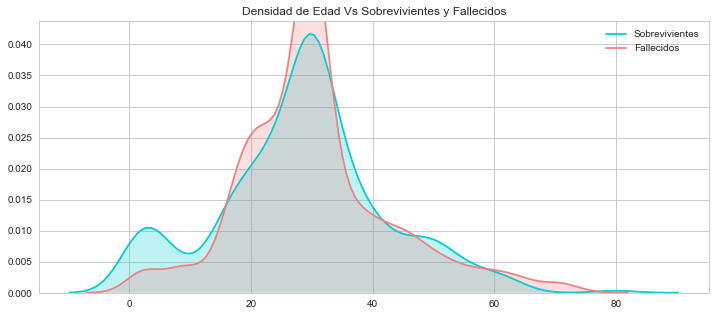

In [10]:
plt.figure(figsize=(12,5))
sns.kdeplot(pass_df["Age"][pass_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(pass_df["Age"][pass_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Sobrevivientes', 'Fallecidos'])
plt.title('Densidad de Edad Vs Sobrevivientes y Fallecidos')
plt.show()

La mayor cantidad de personas fallecidas son corresponde al rango etario de 30 años. Por otra parte, la mayoría de los niños de 1 año sobrevivieron.

In [15]:
labels = pass_df["Survived"]
values = pass_df["Fare"]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

Se tiene que la mayoria de las personas que sobrevivieron pagaron mas.

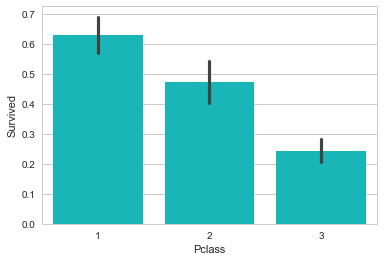

In [59]:
sns.barplot('Pclass', 'Survived', data=pass_df, color="darkturquoise")
plt.show()

In [68]:
pass_pclass_query = "SELECT sum(Survived),Pclass, (sum(Survived)*100/count(*)) as Porcentage_Sobrvivientes FROM [titanic-231219.titanic.titanic_passenger] group by Pclass "

pass_pclass_df = gbq.read_gbq(pass_pclass_query, project_id=project_id)
pass_pclass_df


,f0_,Pclass,Porcentage_Sobrvivientes
0,87,2,47.282609
1,119,3,24.236253
2,136,1,62.962963


Se puede ver que casi un 63% de la clase 1 sobrevivio, mientras que solo el 24% de la clase 3 sobrevivio. Por lo tanto es posible inferir que existe una gran relacion entre la variable "Pclass" y "Survived".

In [73]:
from scipy.stats import chisquare
import scipy.stats

Survived_df = pd.to_numeric(pass_df['Survived'], errors='coerce')
Pclass_df = pd.to_numeric(pass_df['Pclass'], errors='coerce')

ct=pd.crosstab(Survived_df, Pclass_df)
print (ct)
# column percentages
colsum=ct.sum(axis=0)
colpct=ct/colsum
print(colpct)
# chi-square
print ('chi-square value, p value, expected counts')
cs= scipy.stats.chi2_contingency(ct)
print (cs)
       

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Pclass          1         2         3
Survived                             
0         0.37037  0.527174  0.757637
1         0.62963  0.472826  0.242363
chi-square value, p value, expected counts
(102.88898875696056, 4.5492517112987927e-23, 2, array([[ 133.09090909,  113.37373737,  302.53535354],
       [  82.90909091,   70.62626263,  188.46464646]]))


Por medio del test de hipótesis "Chi-Cuadrado" es posible ver significancia estadística en la relación de las dos variables categóricas "Survived" (variable dependiente) y "PCLass" (Independiente). 
Debido a que el valor de chi es mayor a 3.84 y el valor de p es menor a 0.003, hay una gran relación entre estas dos variables, lo que indica que puede ser un buen indicador para predecir.



In [116]:
labels = pass_df["Sex"]
values = pass_df["Survived"]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

Si eres o fueras mujer, y además hubieras estado en el Titanic, es más probable que sobrevivieras en comparación a que si eres o fueras hombre.

In [86]:
Survived_df = pd.to_numeric(pass_df['Survived'], errors='coerce')
Sex_df = pass_df['Sex']
Sex_df = Sex_df.replace('male', '0')
Sex_df = Sex_df.replace('female', '1')

Sex_df = pd.to_numeric(Sex_df, errors='coerce')

ct=pd.crosstab(Survived_df, Sex_df)
print (ct)
# column percentages
colsum=ct.sum(axis=0)
colpct=ct/colsum
print(colpct)
# chi-square
print ('chi-square value, p value, expected counts')
cs= scipy.stats.chi2_contingency(ct)
print (cs)


Sex         0    1
Survived          
0         468   81
1         109  233
Sex              0         1
Survived                    
0         0.811092  0.257962
1         0.188908  0.742038
chi-square value, p value, expected counts
(260.71702016732104, 1.1973570627755645e-58, 1, array([[ 355.52525253,  193.47474747],
       [ 221.47474747,  120.52525253]]))


Al igual que la variable "Pclass", la variable "Sex" tuvo un gran impacto en las posibilidades de supervivencia.

Por último, se analizará el impacto que tiene cada variable con la supervivencia por medio de "Random Forest".

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Eliminar variables de nombre e id
if 'PassengerId' in pass_df:
    pass_df = pass_df.drop('PassengerId',axis=1)
if 'Name' in pass_df:
    pass_df = pass_df.drop('Name',axis=1)
if 'Ticket' in pass_df:
    pass_df = pass_df.drop('Ticket',axis=1)
if 'Fare' in pass_df:
    pass_df = pass_df.drop('Fare',axis=1)

#Transformar variables catogericas a numericas
pass_df.Sex = pass_df.Sex.replace('male', 0)
pass_df.Sex = pass_df.Sex.replace('female', 1)

pass_df.Embarked = pass_df.Embarked.replace('S', 0)
pass_df.Embarked = pass_df.Embarked.replace('C', 1)
pass_df.Embarked = pass_df.Embarked.replace('Q', 2)


#25% de test y 75 de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(pass_df.drop('Survived',axis=1), pass_df.Survived, test_size=0.25)

#Clasficador random forest
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

#Significancia de varibles
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

#Graficar
data = [go.Bar(
            x=X_train.columns,
            y=feature_importances.importance
    )]

py.iplot(data, filename='basic-bar')


En Conclusión, lo que determinaba mayormente la supervivencia de los pasajeros era la clase en que viajaban, particularmente la primera clase se vio más favorecida, en la que un 63% de ellos sobrevivió.
Además, el 68% de las mujeres sobrevivió.
Por otra parte, los niños también tuvieron buenas chances de supervivencia.
